Using IMDB dataset, Perperaing the data and buliding the Network

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.6085 - accuracy: 0.6437 - val_loss: 0.5255 - val_accuracy: 0.7507
Epoch 2/20
30/30 [==============================] - 2s 66ms/step - loss: 0.4368 - accuracy: 0.8657 - val_loss: 0.3871 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2950 - accuracy: 0.9134 - val_loss: 0.3061 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2160 - accuracy: 0.9310 - val_loss: 0.2835 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1745 - accuracy: 0.9448 - val_loss: 0.2793 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1455 - accuracy: 0.9551 - val_loss: 0.3057 - val_accuracy: 0.8769
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1235 - accuracy: 0.9628 - val_loss: 0.3233 - val_accuracy: 0.8725
Epoch 8/20
30

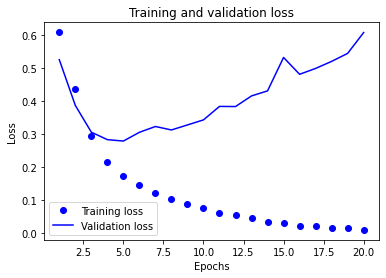

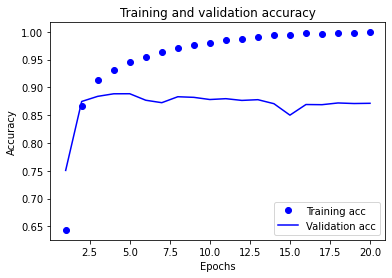

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4620 - accuracy: 0.8025
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2650 - accuracy: 0.9064
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2106 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3205 - accuracy: 0.8746


[0.32053160667419434, 0.8745999932289124]

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the above data by using three hidden layers

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5196 - accuracy: 0.7586 - val_loss: 0.3719 - val_accuracy: 0.8559
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2963 - accuracy: 0.8912 - val_loss: 0.2921 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1975 - accuracy: 0.9328 - val_loss: 0.3153 - val_accuracy: 0.8730
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1684 - accuracy: 0.9410 - val_loss: 0.3112 - val_accuracy: 0.8789
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1247 - accuracy: 0.9578 - val_loss: 0.3063 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0988 - accuracy: 0.9701 - val_loss: 0.3282 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0808 - accuracy: 0.9749 - val_loss: 0.3491 - val_accuracy: 0.8794
Epoch 8/20
30

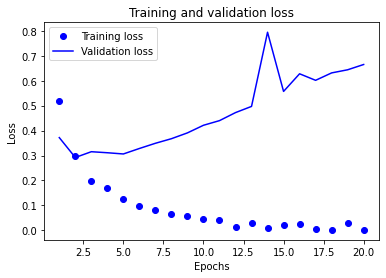

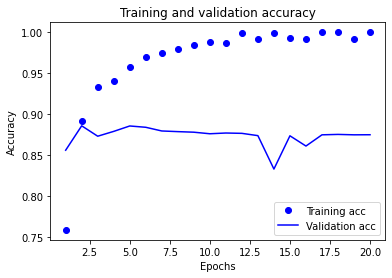

Epoch 1/2
49/49 [==============================] - 3s 32ms/step - loss: 0.4903 - accuracy: 0.7926
Epoch 2/2
782/782 [==============================] - 4s 5ms/step - loss: 0.3132 - accuracy: 0.8720


[0.31316569447517395, 0.8720399737358093]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the data by using one hidden layer with 32 hidden units

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5058 - accuracy: 0.7843 - val_loss: 0.4363 - val_accuracy: 0.8092
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3216 - accuracy: 0.8961 - val_loss: 0.3465 - val_accuracy: 0.8565
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2565 - accuracy: 0.9141 - val_loss: 0.2904 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2142 - accuracy: 0.9300 - val_loss: 0.2783 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1888 - accuracy: 0.9380 - val_loss: 0.2775 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1681 - accuracy: 0.9471 - val_loss: 0.3051 - val_accuracy: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1503 - accuracy: 0.9529 - val_loss: 0.2794 - val_accuracy: 0.8846
Epoch 8/20
30

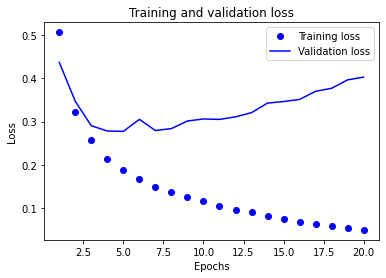

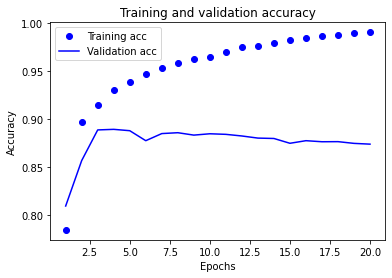

Epoch 1/2
49/49 [==============================] - 2s 35ms/step - loss: 0.4393 - accuracy: 0.8223
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.2931 - accuracy: 0.8861


[0.2931278645992279, 0.8861200213432312]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the data by using three hidden layers with 64 hidden units

Epoch 1/20
30/30 [==============================] - 7s 165ms/step - loss: 0.5219 - accuracy: 0.7548 - val_loss: 0.3492 - val_accuracy: 0.8678
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2951 - accuracy: 0.8893 - val_loss: 0.2830 - val_accuracy: 0.8902
Epoch 3/20
30/30 [==============================] - 3s 107ms/step - loss: 0.2126 - accuracy: 0.9217 - val_loss: 0.2995 - val_accuracy: 0.8796
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1719 - accuracy: 0.9348 - val_loss: 0.3917 - val_accuracy: 0.8520
Epoch 5/20
30/30 [==============================] - 2s 75ms/step - loss: 0.1312 - accuracy: 0.9523 - val_loss: 0.4301 - val_accuracy: 0.8488
Epoch 6/20
30/30 [==============================] - 2s 69ms/step - loss: 0.1046 - accuracy: 0.9619 - val_loss: 0.3296 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.0779 - accuracy: 0.9740 - val_loss: 0.4032 - val_accuracy: 0.8714
Epoch 8/20


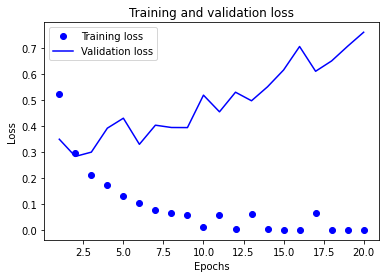

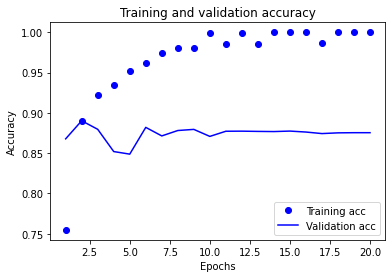

Epoch 1/2
49/49 [==============================] - 6s 105ms/step - loss: 0.4613 - accuracy: 0.7820
Epoch 2/2
782/782 [==============================] - 4s 5ms/step - loss: 0.3136 - accuracy: 0.8697


[0.31364768743515015, 0.8697199821472168]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the data by using one hidden layer with 32 hidden units and mse loss function 

Epoch 1/20
30/30 [==============================] - 4s 105ms/step - loss: 0.1685 - accuracy: 0.7806 - val_loss: 0.1233 - val_accuracy: 0.8646
Epoch 2/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1034 - accuracy: 0.8865 - val_loss: 0.1010 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 2s 65ms/step - loss: 0.0814 - accuracy: 0.9113 - val_loss: 0.0946 - val_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0702 - accuracy: 0.9221 - val_loss: 0.0878 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 2s 78ms/step - loss: 0.0628 - accuracy: 0.9300 - val_loss: 0.0910 - val_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0573 - accuracy: 0.9375 - val_loss: 0.0894 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0520 - accuracy: 0.9459 - val_loss: 0.0837 - val_accuracy: 0.8859
Epoch 8/20
3

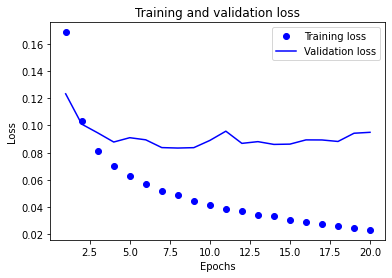

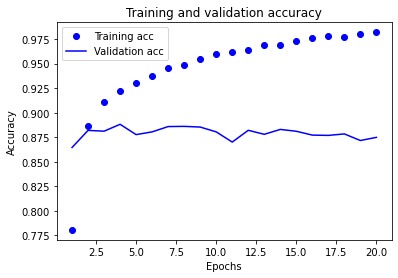

Epoch 1/2
49/49 [==============================] - 2s 36ms/step - loss: 0.1455 - accuracy: 0.8088
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.0903 - accuracy: 0.8860


[0.09027491509914398, 0.8859599828720093]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the data by using three hidden layers with 32 hidden units and mse loss function and  tanh activation 

Epoch 1/20
30/30 [==============================] - 3s 83ms/step - loss: 0.1624 - accuracy: 0.7623 - val_loss: 0.1004 - val_accuracy: 0.8682
Epoch 2/20
30/30 [==============================] - 2s 80ms/step - loss: 0.0851 - accuracy: 0.8878 - val_loss: 0.0866 - val_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0631 - accuracy: 0.9183 - val_loss: 0.0863 - val_accuracy: 0.8816
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0487 - accuracy: 0.9392 - val_loss: 0.1174 - val_accuracy: 0.8474
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0462 - accuracy: 0.9402 - val_loss: 0.0899 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0364 - accuracy: 0.9552 - val_loss: 0.0946 - val_accuracy: 0.8793
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0318 - accuracy: 0.9608 - val_loss: 0.1328 - val_accuracy: 0.8370
Epoch 8/20
30

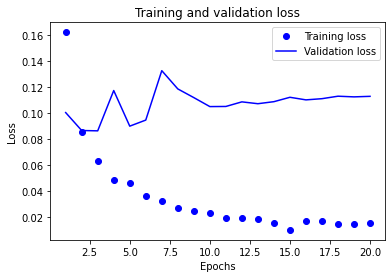

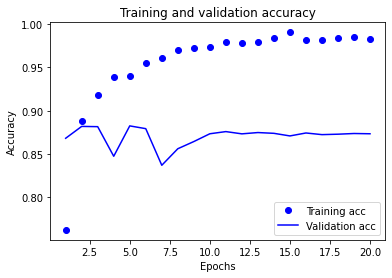

Epoch 1/2
49/49 [==============================] - 3s 35ms/step - loss: 0.1370 - accuracy: 0.8027
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.0850 - accuracy: 0.8839


[0.0850268080830574, 0.8838800191879272]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the data by using one hidden layer with 64 hidden units and mse loss function and  tanh activation

Epoch 1/20
30/30 [==============================] - 5s 148ms/step - loss: 0.1699 - accuracy: 0.7595 - val_loss: 0.1146 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 2s 75ms/step - loss: 0.0969 - accuracy: 0.8887 - val_loss: 0.0937 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 5s 186ms/step - loss: 0.0785 - accuracy: 0.9071 - val_loss: 0.0894 - val_accuracy: 0.8825
Epoch 4/20
30/30 [==============================] - 4s 125ms/step - loss: 0.0690 - accuracy: 0.9169 - val_loss: 0.0850 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 2s 72ms/step - loss: 0.0600 - accuracy: 0.9289 - val_loss: 0.0822 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0530 - accuracy: 0.9365 - val_loss: 0.0867 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 2s 71ms/step - loss: 0.0463 - accuracy: 0.9465 - val_loss: 0.1092 - val_accuracy: 0.8507
Epoch 8/20

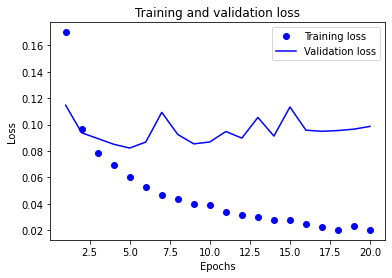

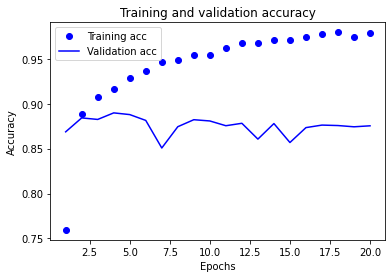

Epoch 1/2
49/49 [==============================] - 3s 54ms/step - loss: 0.1400 - accuracy: 0.8144
Epoch 2/2
782/782 [==============================] - 4s 4ms/step - loss: 0.0948 - accuracy: 0.8730


[0.09484273195266724, 0.8730400204658508]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
   layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the data by using one hidden layer with 32 hidden units and binary crossentropy loss function and  tanh activation

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.4789 - accuracy: 0.7967 - val_loss: 0.3646 - val_accuracy: 0.8666
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2978 - accuracy: 0.8983 - val_loss: 0.2998 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2323 - accuracy: 0.9214 - val_loss: 0.2819 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1931 - accuracy: 0.9333 - val_loss: 0.2907 - val_accuracy: 0.8808
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1658 - accuracy: 0.9458 - val_loss: 0.2737 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1462 - accuracy: 0.9514 - val_loss: 0.3132 - val_accuracy: 0.8740
Epoch 7/20
30/30 [==============================] - 2s 74ms/step - loss: 0.1268 - accuracy: 0.9583 - val_loss: 0.2943 - val_accuracy: 0.8860
Epoch 8/20
30

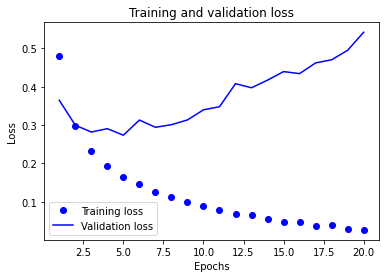

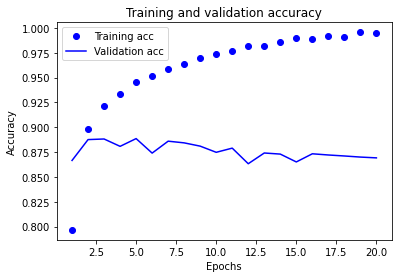

Epoch 1/2
49/49 [==============================] - 4s 56ms/step - loss: 0.4415 - accuracy: 0.8258
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.2846 - accuracy: 0.8894


[0.28457120060920715, 0.8893600106239319]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the data by using three hidden layers with 32 hidden units and binary crossentropy loss function and  tanh activation

Epoch 1/20
30/30 [==============================] - 5s 145ms/step - loss: 0.4776 - accuracy: 0.7667 - val_loss: 0.3282 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 2s 81ms/step - loss: 0.2587 - accuracy: 0.8947 - val_loss: 0.2728 - val_accuracy: 0.8908
Epoch 3/20
30/30 [==============================] - 3s 109ms/step - loss: 0.1913 - accuracy: 0.9249 - val_loss: 0.3061 - val_accuracy: 0.8735
Epoch 4/20
30/30 [==============================] - 3s 101ms/step - loss: 0.1592 - accuracy: 0.9391 - val_loss: 0.2975 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 2s 76ms/step - loss: 0.1250 - accuracy: 0.9529 - val_loss: 0.4209 - val_accuracy: 0.8511
Epoch 6/20
30/30 [==============================] - 2s 78ms/step - loss: 0.1046 - accuracy: 0.9609 - val_loss: 0.4127 - val_accuracy: 0.8682
Epoch 7/20
30/30 [==============================] - 2s 76ms/step - loss: 0.0874 - accuracy: 0.9693 - val_loss: 0.4758 - val_accuracy: 0.8465
Epoch 8/20

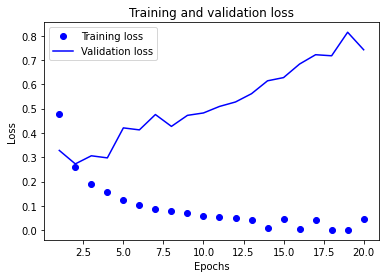

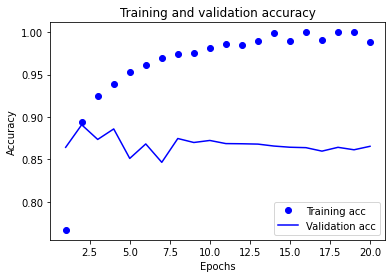

Epoch 1/2
49/49 [==============================] - 4s 45ms/step - loss: 0.4149 - accuracy: 0.8169
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.2770 - accuracy: 0.8858


[0.27704980969429016, 0.8858399987220764]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Retraining the data by using three hidden layers with 32 hidden units, binary crossentropy loss function,tanh activation and dropout method to perform better on validation

Epoch 1/20
30/30 [==============================] - 3s 78ms/step - loss: 0.4845 - accuracy: 0.7775 - val_loss: 0.3258 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2622 - accuracy: 0.8977 - val_loss: 0.2716 - val_accuracy: 0.8904
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1990 - accuracy: 0.9253 - val_loss: 0.3006 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1588 - accuracy: 0.9403 - val_loss: 0.4566 - val_accuracy: 0.8330
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1302 - accuracy: 0.9509 - val_loss: 0.3287 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1087 - accuracy: 0.9621 - val_loss: 0.3728 - val_accuracy: 0.8726
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1050 - accuracy: 0.9621 - val_loss: 0.3708 - val_accuracy: 0.8776
Epoch 8/20
30

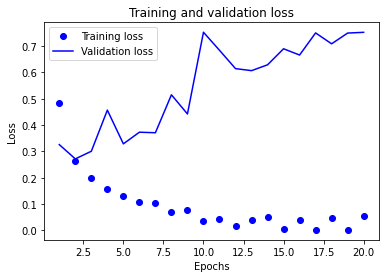

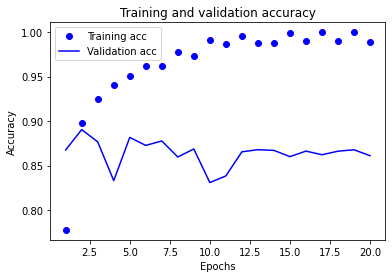

Epoch 1/2
49/49 [==============================] - 3s 40ms/step - loss: 0.4206 - accuracy: 0.8070
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.2777 - accuracy: 0.8870


[0.2776862382888794, 0.8870400190353394]

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results